# Introducción a TensorFlow

**Descargué el Dataset de [Aquí](https://btsd.ethz.ch/shareddata/)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random
import skimage.data as imd
from skimage import transform
from skimage.color import rgb2gray
plt.style.use("ggplot")
session = tf.Session()

In [2]:
x1 = tf.constant([l for l in range(1,6)])
x2 = tf.constant([l for l in range(6,11)])
rest = tf.multiply(x1,x2)
session.run(rest)

array([ 6, 14, 24, 36, 50])

In [3]:
# Otra manera de abrir sesión
with tf.Session() as session:
    output = session.run(rest)
    print(output)

[ 6 14 24 36 50]


In [4]:
# Vincular la sesión y permitir hacer logs tanto a 
# a CPU como GPU para las operaciones que se lleven a cabo.
config = tf.ConfigProto(log_device_placement = True,
                       allow_soft_placement = True)
config

allow_soft_placement: true
log_device_placement: true

### Aprendizaje Neuronal de las Señales de Tráfico

In [5]:
def load_ml_data(data_directory):
    dirs = sorted([d for d in os.listdir(data_directory) if
                   os.path.isdir(os.path.join(data_directory,d))])
    print(f"Directorios Existentes en la Ubicación: {data_directory} \n")
    print(dirs)
    labels = []
    images = []
    for k in dirs:
        label_dir = os.path.join(data_directory,k)
        file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        for f in file_names: # Leemos las imagenes
            images.append(imd.imread(f))
            labels.append(int(k))
    return images, labels

In [6]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing/")

In [7]:
os.path.isdir(train_data_dir)

True

In [8]:
images, labels = load_ml_data(train_data_dir)

Directorios Existentes en la Ubicación: ../datasets/belgian/Training 

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032']


In [9]:
len(images),len(labels)

(2131, 2131)

In [10]:
type(images), type(labels)

(list, list)

In [11]:
images = np.array(images)
labels = np.array(labels)

In [12]:
images.ndim, labels.ndim, images.size

(1, 1, 2131)

In [13]:
images[0] # Primera foto

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [14]:
len(set(labels)) # Ver cuantas hay distintas

33

In [15]:
len(labels) # De 4575 solo hay 62 tipos de fotos

2131

In [16]:
type(images)

numpy.ndarray

In [17]:
images.flags # Datos generales

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [18]:
images.itemsize # Número de bits para los elementos cargados

8

In [19]:
len(images)

2131

In [20]:
images.nbytes

17048

In [21]:
len(images)*images.itemsize

17048

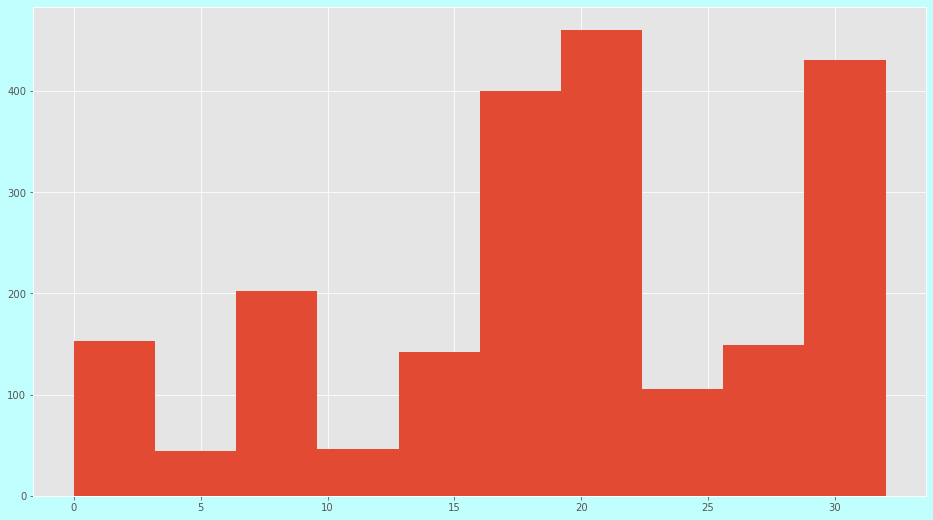

In [22]:
plt.figure(figsize=(16,9), facecolor=(.2,1,1,.3))
plt.hist(labels)
plt.show()

In [23]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[763, 365, 950, 44, 455, 400]

Para la imagen: 0 Formato: (63, 74, 3), min: 20, max: 193
Para la imagen: 1 Formato: (116, 130, 3), min: 4, max: 255
Para la imagen: 2 Formato: (111, 130, 3), min: 0, max: 255
Para la imagen: 3 Formato: (63, 25, 3), min: 24, max: 255
Para la imagen: 4 Formato: (108, 117, 3), min: 0, max: 255
Para la imagen: 5 Formato: (85, 96, 3), min: 0, max: 255


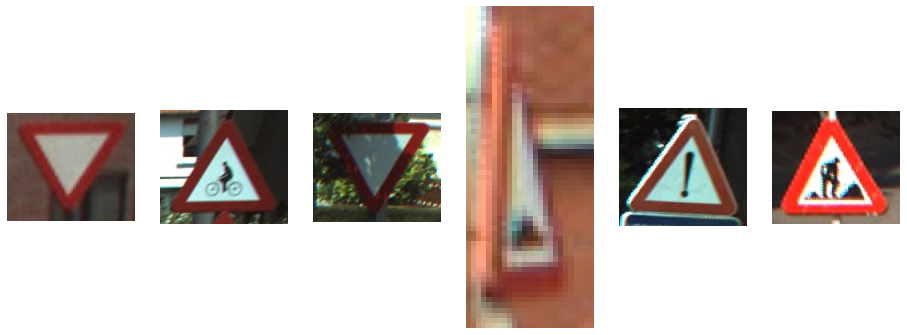

In [24]:
plt.figure(figsize=(16,9))
for i in range(len(rand_signs)):
    temp_in = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    print(f"Para la imagen: {i} Formato: {temp_in.shape}, min: {temp_in.min()}, max: {temp_in.max()}")
plt.show()
    

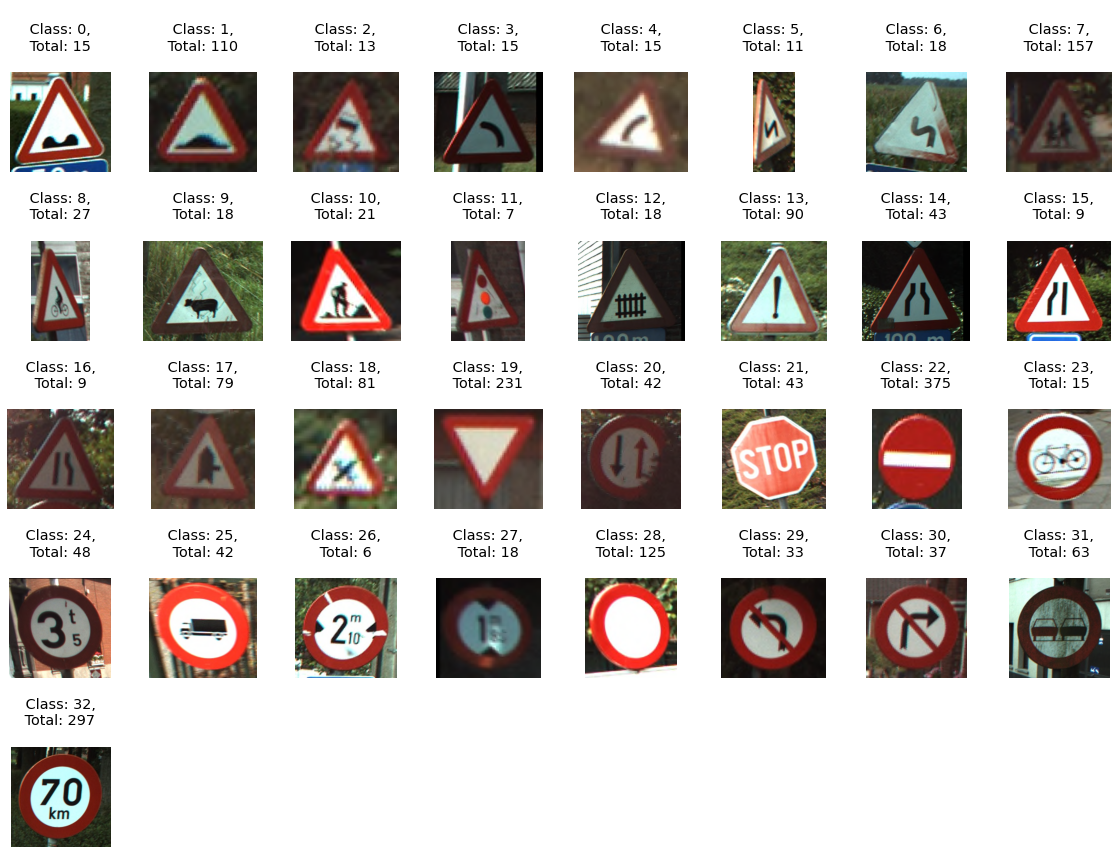

In [25]:
unique_labels = set(labels)
plt.figure(figsize=(16,19))
i = 1
for label in unique_labels:
    temp_in = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title(f"\n Class: {label}, \n Total: {list(labels).count(label)} \n")
    plt.imshow(temp_in)
    i+=1
plt.tight_layout()
plt.show()

## Modelo de Red Neuronal con TensorFlow
 
- Las no todas las imágenes son del mismo tamaño.
- Hay 62 clases de imágenes (desde 0 a 61).
- La distribución de aparición en las señales de tránsito no es uniforme.

In [26]:
w = 9999
h = 9999
for image in images:
    if image.shape[0]<h:
        h = image.shape[0]
    if image.shape[1]<w:
        w = image.shape[1]
print(f"Tamaño mínimo: {h}x{w}")
w = 0
h = 0
for image in images:
    if image.shape[0]>h:
        h = image.shape[0]
    if image.shape[1]>w:
        w = image.shape[1]
print(f"Tamaño máximo: {h}x{w}")

Tamaño mínimo: 29x20
Tamaño máximo: 724x527


In [27]:
images_ = [transform.resize(image,(30,30)) for image in images]

Para la imagen: 0 Formato: (30, 30, 3), min: 0.0, max: 0.7754901960784306
Para la imagen: 1 Formato: (30, 30, 3), min: 0.06903267973856209, max: 0.996078431372549
Para la imagen: 2 Formato: (30, 30, 3), min: 0.043137254901960784, max: 0.9215686274509803
Para la imagen: 3 Formato: (30, 30, 3), min: 0.09947712418300655, max: 0.9498039215686275
Para la imagen: 4 Formato: (30, 30, 3), min: 0.0746535947712419, max: 0.9186797385620914
Para la imagen: 5 Formato: (30, 30, 3), min: 0.034836601307189796, max: 0.8013725490196094


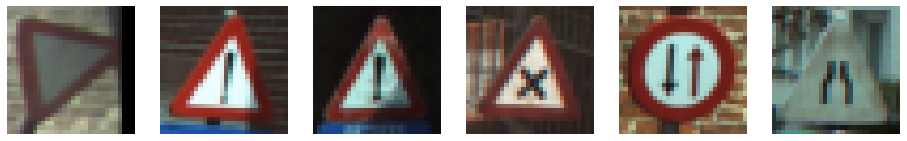

In [28]:
rand_signs = np.random.choice(range(0,len(labels)),6)
plt.figure(figsize=(16,9))
for i in range(len(rand_signs)):
    temp_in = images_[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images_[rand_signs[i]])
    print(f"Para la imagen: {i} Formato: {temp_in.shape}, min: {temp_in.min()}, max: {temp_in.max()}")
plt.show()

Para la imagen: 0 Formato: (120, 100, 3), min: 0, max: 241
Para la imagen: 1 Formato: (129, 134, 3), min: 0, max: 255
Para la imagen: 2 Formato: (116, 124, 3), min: 1, max: 249
Para la imagen: 3 Formato: (98, 104, 3), min: 9, max: 255
Para la imagen: 4 Formato: (178, 171, 3), min: 0, max: 255
Para la imagen: 5 Formato: (104, 111, 3), min: 0, max: 255


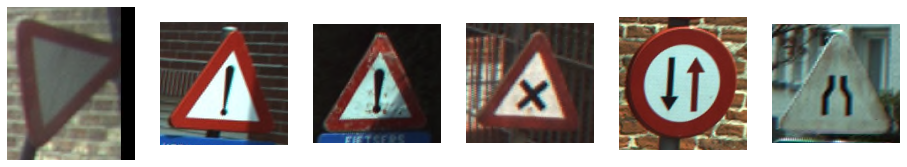

In [29]:
# Ver si disminuye calidad
plt.figure(figsize=(16,9))
for i in range(len(rand_signs)):
    temp_in = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    print(f"Para la imagen: {i} Formato: {temp_in.shape}, min: {temp_in.min()}, max: {temp_in.max()}")
plt.show()

In [30]:
images30 = np.array(images_)
images30 = rgb2gray(images30)

Para la imagen: 0 Formato: (30, 30), min: 0.05879858823529418, max: 0.9738484705882353
Para la imagen: 1 Formato: (30, 30), min: 0.07924980392156862, max: 0.9664543355119826
Para la imagen: 2 Formato: (30, 30), min: 0.178433084640523, max: 0.8005082176470594
Para la imagen: 3 Formato: (30, 30), min: 0.0, max: 0.9921568627450981
Para la imagen: 4 Formato: (30, 30), min: 0.0862142483660129, max: 0.996078431372549
Para la imagen: 5 Formato: (30, 30), min: 0.13005205228758163, max: 0.996078431372549


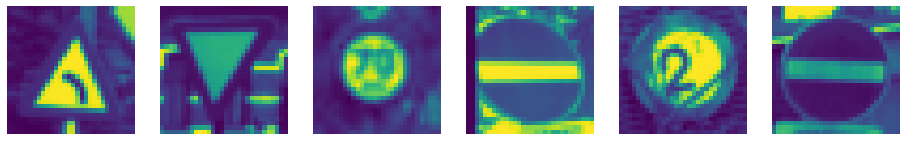

In [31]:
rand_signs = np.random.choice(range(0,len(labels)),6)
plt.figure(figsize=(16,9))
for i in range(len(rand_signs)):
    temp_in = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images30[rand_signs[i]])
    print(f"Para la imagen: {i} Formato: {temp_in.shape}, min: {temp_in.min()}, max: {temp_in.max()}")
plt.show()

In [32]:
x = tf.placeholder(dtype=tf.float32, shape = [None,30,30])
y = tf.placeholder(dtype=tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y,
                                                                    logits = logits))

train_opt = tf.train.AdadeltaOptimizer(learning_rate=0.05).minimize(loss)
final_pred = tf.argmax(logits,axis = 1)

accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\sacel\APython3\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [33]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for i in range(1801):
    _, accuracy_val = session.run([train_opt,accuracy],
                                 feed_dict = {x:images30,
                                              y:list(labels)})
    if (i+1)%50==0:
        print(f"Epoch {i+1}. Eficacia {accuracy_val}.")

Epoch 50. Eficacia 18.41436004638672.
Epoch 100. Eficacia 21.78367042541504.
Epoch 150. Eficacia 22.38573455810547.
Epoch 200. Eficacia 23.100421905517578.
Epoch 250. Eficacia 23.962928771972656.
Epoch 300. Eficacia 24.759267807006836.
Epoch 350. Eficacia 25.074613571166992.
Epoch 400. Eficacia 25.03144073486328.
Epoch 450. Eficacia 24.89910888671875.
Epoch 500. Eficacia 24.468793869018555.
Epoch 550. Eficacia 23.968090057373047.
Epoch 600. Eficacia 23.3646183013916.
Epoch 650. Eficacia 23.013608932495117.
Epoch 700. Eficacia 22.65227508544922.
Epoch 750. Eficacia 22.358516693115234.
Epoch 800. Eficacia 22.08634376525879.
Epoch 850. Eficacia 21.775222778320312.
Epoch 900. Eficacia 21.610980987548828.
Epoch 950. Eficacia 21.42937660217285.
Epoch 1000. Eficacia 21.286720275878906.
Epoch 1050. Eficacia 21.18488883972168.
Epoch 1100. Eficacia 21.06757354736328.
Epoch 1150. Eficacia 21.024402618408203.
Epoch 1200. Eficacia 20.931488037109375.
Epoch 1250. Eficacia 20.837635040283203.
Epoch 1

## Evaluando la Red Neuronal

In [34]:
sample_idx = random.sample(range(len(images30)),40)
sample_images = [images30[l] for l in sample_idx]
sample_labels = [labels[l] for l in sample_idx]

In [35]:
prediction_en_probabilidad = session.run(logits, feed_dict={x:sample_images})

In [36]:
prediction_en_probabilidad

array([[-0.       ,  1.5869845, -0.       , ..., -0.       , -0.       ,
        -0.       ],
       [-0.       ,  3.5981765, -0.       , ..., -0.       , -0.       ,
        -0.       ],
       [-0.       ,  1.4758284, -0.       , ..., -0.       , -0.       ,
        -0.       ],
       ...,
       [-0.       ,  1.2795416, -0.       , ..., -0.       , -0.       ,
        -0.       ],
       [-0.       ,  2.5599513, -0.       , ..., -0.       , -0.       ,
        -0.       ],
       [-0.       , -0.       , -0.       , ..., -0.       , -0.       ,
        -0.       ]], dtype=float32)

In [37]:
prediction = np.argmax(prediction_en_probabilidad,axis = 1)
prediction

array([19, 17, 18, 22, 22,  7, 19,  6, 32, 28, 22,  7,  7,  1, 14, 22, 18,
       22,  1,  7, 22, 21, 32, 32,  1, 32, 22, 22, 19, 17, 22, 22, 17, 32,
       19,  1, 22, 19, 32, 32], dtype=int64)

In [38]:
prediction = session.run(final_pred, feed_dict={x:sample_images})
prediction

array([19, 17, 18, 22, 22,  7, 19,  6, 32, 28, 22,  7,  7,  1, 14, 22, 18,
       22,  1,  7, 22, 21, 32, 32,  1, 32, 22, 22, 19, 17, 22, 22, 17, 32,
       19,  1, 22, 19, 32, 32], dtype=int64)

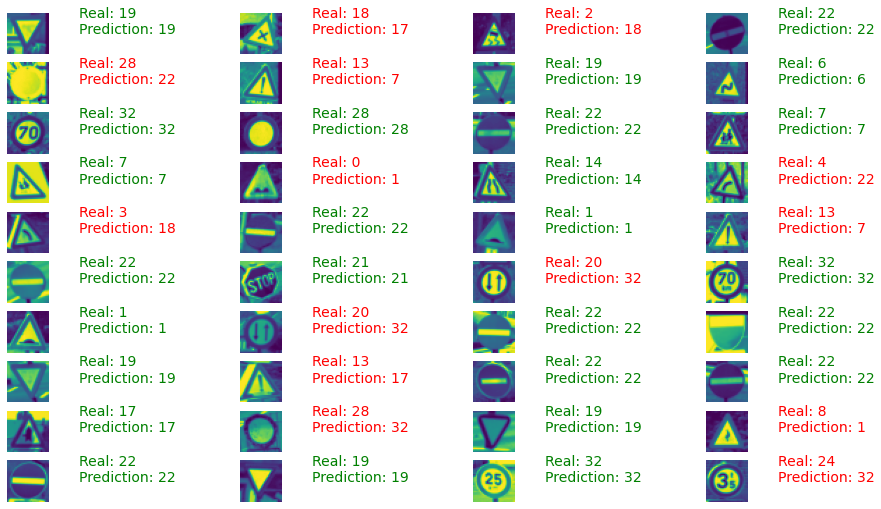

In [39]:
plt.figure(figsize=(16,9))
for i in range(len(sample_idx)):
    truth = sample_labels[i]
    pred = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==pred else "red"
    plt.text(32,15, f"      Real: {truth} \n      Prediction: {pred}", fontsize = 14,
            color = color)
    plt.imshow(sample_images[i])
plt.show()

In [40]:
test_images, test_labels = load_ml_data(test_data_dir)
test_images30 = [transform.resize(im,(30,30)) for im in test_images]
test_images30 = rgb2gray(np.array(test_images30))
prediction = session.run([final_pred], feed_dict={x:test_images30})

Directorios Existentes en la Ubicación: ../datasets/belgian/Testing/ 

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [41]:
prediction = session.run([final_pred], feed_dict={x:test_images30})

In [42]:
match_count = sum([l0==l1 for l0,l1 in zip(test_labels, prediction[0])])
match_count

1132

In [43]:
acc = match_count/len(prediction[0])
print(f"Eficiencia de la Red Neuronal {acc}")

Eficiencia de la Red Neuronal 0.4492063492063492
